<a href="https://colab.research.google.com/github/jchpabon/Machine-Learning/blob/main/StockPrediction/NeuralProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install neuralprophet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.1/137.1 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.2/378.2 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 52.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 14.0 

In [2]:
pip install yfinance

In [3]:
from neuralprophet import NeuralProphet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt





/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda20CUDACachingAllocator9allocatorE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [4]:
ticker = 'NVDA'
start_date = '2018-01-01'
end_date = '2024-01-08'

data = yf.download(ticker,start=start_date,end=end_date)

print(data)
data.to_csv('data.csv')

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-02   48.945000   49.875000   48.625000   49.837502   49.312794   
2018-01-03   51.025002   53.424999   50.937500   53.117500   52.558254   
2018-01-04   53.939999   54.512501   53.172501   53.397499   52.835312   
2018-01-05   53.547501   54.227501   52.770000   53.849998   53.283039   
2018-01-08   55.099998   56.250000   54.645000   55.500000   54.915676   
...                ...         ...         ...         ...         ...   
2023-12-29  498.130005  499.970001  487.510010  495.220001  495.220001   
2024-01-02  492.440002  492.950012  475.950012  481.679993  481.679993   
2024-01-03  474.850006  481.839996  473.200012  475.690002  475.690002   
2024-01-04  477.670013  485.000000  475.079987  479.980011  479.980011   
2024-01-05  484.619995  495.470001  483.059

In [7]:
stock = pd.read_csv('data.csv')
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1513 non-null   object 
 1   Open       1513 non-null   float64
 2   High       1513 non-null   float64
 3   Low        1513 non-null   float64
 4   Close      1513 non-null   float64
 5   Adj Close  1513 non-null   float64
 6   Volume     1513 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.9+ KB


In [8]:
stock['Date'] = pd.to_datetime(stock['Date'])
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1513 non-null   datetime64[ns]
 1   Open       1513 non-null   float64       
 2   High       1513 non-null   float64       
 3   Low        1513 non-null   float64       
 4   Close      1513 non-null   float64       
 5   Adj Close  1513 non-null   float64       
 6   Volume     1513 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 82.9 KB


In [9]:
stock = stock[['Date','Close']]
stock

,Date,Close
0,2018-01-02,49.837502
1,2018-01-03,53.117500
2,2018-01-04,53.397499
3,2018-01-05,53.849998
4,2018-01-08,55.500000
...,...,...
1508,2023-12-29,495.220001
1509,2024-01-02,481.679993
1510,2024-01-03,475.690002
1511,2024-01-04,479.980011


In [11]:
stock.columns = ['ds','y']
stock

,ds,y
0,2018-01-02,49.837502
1,2018-01-03,53.117500
2,2018-01-04,53.397499
3,2018-01-05,53.849998
4,2018-01-08,55.500000
...,...,...
1508,2023-12-29,495.220001
1509,2024-01-02,481.679993
1510,2024-01-03,475.690002
1511,2024-01-04,479.980011


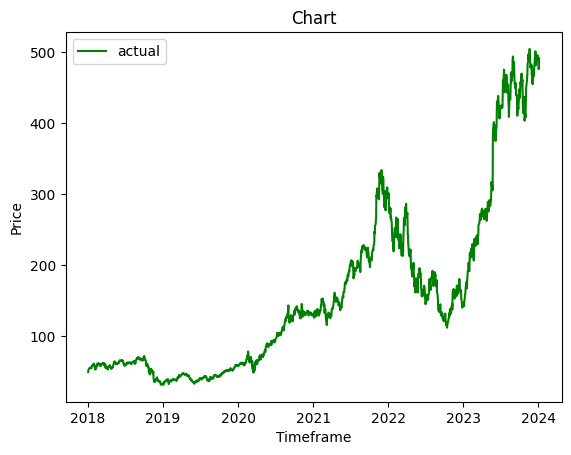

In [14]:
plt.plot(stock['ds'],stock['y'],label='actual', c='g')
plt.xlabel('Timeframe')
plt.ylabel('Price')
plt.title('Chart')
plt.legend()
plt.show()


**Training**


In [15]:
model = NeuralProphet()
model.fit(stock)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.233% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.233% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO:NP.df_utils:Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.co

Finding best initial lr:   0%|          | 0/230 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,402.667267,532.512146,0.450352,0.0,0
1,390.284393,515.606995,0.432221,0.0,1
2,371.243805,493.620728,0.401693,0.0,2
3,354.109528,471.944702,0.375217,0.0,3
4,324.667206,434.287384,0.327541,0.0,4
...,...,...,...,...,...
166,22.906563,28.825891,0.002099,0.0,166
167,22.792067,28.736441,0.002084,0.0,167
168,22.844543,28.772148,0.002090,0.0,168
169,22.923273,28.873207,0.002099,0.0,169


from matplotlib import pyplot as plt
_df_0['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Loss'].plot(kind='hist', bins=20, title='Loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['epoch'].plot(kind='hist', bins=20, title='epoch')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='MAE', y='RMSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='RMSE', y='Loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Loss', y='epoch', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RegLoss']
  ys = series['MAE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('RegLoss', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RegLoss')
_ = plt.ylabel('MAE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RegLoss']
  ys = series['RMSE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('RegLoss', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RegLoss')
_ = plt.ylabel('RMSE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RegLoss']
  ys = series['Loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('RegLoss', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RegLoss')
_ = plt.ylabel('Loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['RegLoss']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'RegLoss'}, axis=1)
              .sort_values('RegLoss', ascending=True))
  xs = counted['RegLoss']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('RegLoss', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RegLoss')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Loss'].plot(kind='line', figsize=(8, 4), title='Loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['epoch'].plot(kind='line', figsize=(8, 4), title='epoch')
plt.gca().spines[['top', 'right']].set_visible(False)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.233% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.233% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.233% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.233% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B


Predicting: 48it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


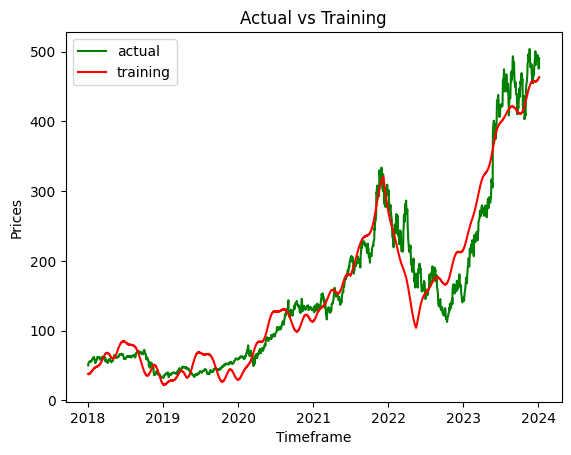

In [25]:
actual_prediction = model.predict(stock)

plt.plot(stock['ds'],stock['y'],label='actual', c='g')
plt.plot(actual_prediction['ds'],actual_prediction['yhat1'],label='training', c='b')
plt.xlabel('Timeframe')
plt.ylabel('Prices')
plt.title('Actual vs Training')
plt.legend()
plt.show()

**Modeling**


In [17]:
#Generating a DateFrame of 300 points in the future
future = model.make_future_dataframe(stock, periods=300)
#Prediciting prices for DateFrame created
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.233% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.233% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.667% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO:NP.df_utils:Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.667% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 99.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 48it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [18]:
forecast

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2024-01-08,None,466.219788,464.055908,-29.097654,31.261511
1,2024-01-09,None,467.420532,464.727051,-28.827793,31.521244
2,2024-01-10,None,467.922028,465.398102,-28.519497,31.043402
3,2024-01-11,None,469.655334,466.069122,-28.175667,31.761833
4,2024-01-12,None,470.206696,466.740173,-27.799381,31.265896
...,...,...,...,...,...,...
295,2025-02-24,None,760.939453,741.193115,-11.515124,31.261511
296,2025-02-25,None,762.286316,741.864258,-11.099172,31.521244
297,2025-02-26,None,762.921936,742.535156,-10.656631,31.043402
298,2025-02-27,None,764.781311,743.206299,-10.186792,31.761833


from matplotlib import pyplot as plt
forecast['yhat1'].plot(kind='hist', bins=20, title='yhat1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
forecast['trend'].plot(kind='hist', bins=20, title='trend')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
forecast['season_yearly'].plot(kind='hist', bins=20, title='season_yearly')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
forecast['season_weekly'].plot(kind='hist', bins=20, title='season_weekly')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
forecast.plot(kind='scatter', x='yhat1', y='trend', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
forecast.plot(kind='scatter', x='trend', y='season_yearly', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
forecast.plot(kind='scatter', x='season_yearly', y='season_weekly', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['yhat1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = forecast.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('yhat1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['season_yearly']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = forecast.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('season_yearly')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['season_weekly']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = forecast.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('season_weekly')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ds']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ds'}, axis=1)
              .sort_values('ds', ascending=True))
  xs = counted['ds']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = forecast.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
forecast['yhat1'].plot(kind='line', figsize=(8, 4), title='yhat1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
forecast['trend'].plot(kind='line', figsize=(8, 4), title='trend')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
forecast['season_yearly'].plot(kind='line', figsize=(8, 4), title='season_yearly')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
forecast['season_weekly'].plot(kind='line', figsize=(8, 4), title='season_weekly')
plt.gca().spines[['top', 'right']].set_visible(False)

In [20]:
forecast[['ds','yhat1']]

,ds,yhat1
0,2024-01-08,466.219788
1,2024-01-09,467.420532
2,2024-01-10,467.922028
3,2024-01-11,469.655334
4,2024-01-12,470.206696
...,...,...
295,2025-02-24,760.939453
296,2025-02-25,762.286316
297,2025-02-26,762.921936
298,2025-02-27,764.781311


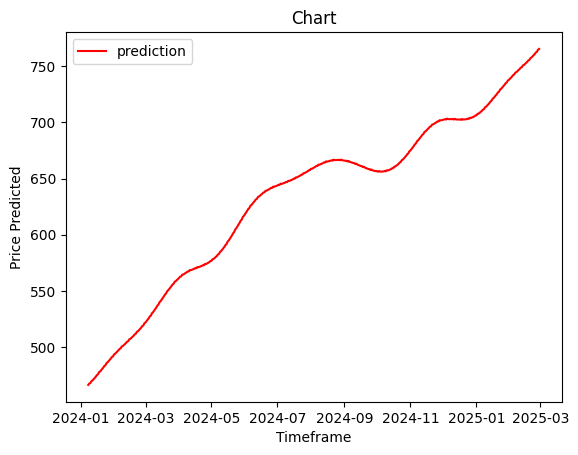

In [21]:
plt.plot(forecast['ds'],forecast['yhat1'],label='prediction', c='r')
plt.xlabel('Timeframe')
plt.ylabel('Price Predicted')
plt.title('Chart')
plt.legend()
plt.show()

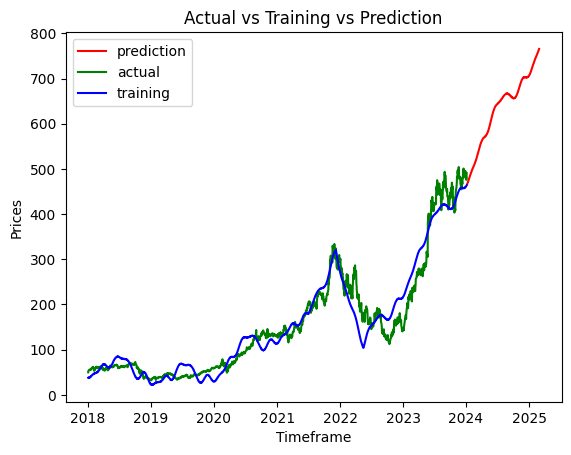

In [27]:
plt.plot(forecast['ds'],forecast['yhat1'],label='prediction', c='r')
plt.plot(stock['ds'],stock['y'],label='actual', c='g')
plt.plot(actual_prediction['ds'],actual_prediction['yhat1'],label='training', c='b')
plt.xlabel('Timeframe')
plt.ylabel('Prices')
plt.title('Actual vs Training vs Prediction')
plt.legend()
plt.show()